<a href="https://colab.research.google.com/github/sowmyakovur20/machinelearninghw/blob/main/MLHomework_4_Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.DataFrame({
    'x': [3, 3, 2, 2, 6, 6, 7, 7, 8, 7],
    'y': [5, 4, 8, 3, 2, 4, 3, 4, 5, 6]
})

In [3]:
np.random.seed(200)

In [4]:
k = 2

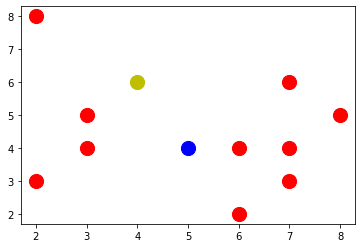

In [5]:
plt.scatter(data['x'], data['y'], s=200,color = 'r')

#Initialize with two centroids
c = {1: [4, 6], 2: [5, 4]}

colmap = {1:'y', 2:'b'}

for i in c.keys():
    plt.scatter(*c[i], s=200, color=colmap[i])

plt.show()

**Using Manhattan Distance**

In [6]:
def assignment(data, c):
    for i in c.keys():
        #Using Manhattan distance as the distance metric
        data['dist_from_{}'.format(i)] = (     
                abs(data['x'] - c[i][0]) 
                    + abs(data['y'] - c[i][1]))
    c_distance_cols = ['dist_from_{}'.format(i) for i in c.keys()]
    data['closest'] = data.loc[:, c_distance_cols].idxmin(axis=1)
    data['closest'] = data['closest'].map(lambda x: int(x.lstrip('dist_from_')))
    data['color'] = data['closest'].map(lambda x: colmap[x])
    return data

data = assignment(data, c)
data.head()

,x,y,dist_from_1,dist_from_2,closest,color
0,3,5,2,3,1,y
1,3,4,3,2,2,b
2,2,8,4,7,1,y
3,2,3,5,4,2,b
4,6,2,6,3,2,b


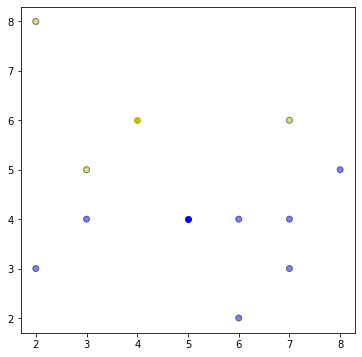

In [7]:
img = plt.figure(figsize=(6,6))
plt.scatter(data['x'], data['y'], color = data['color'], alpha=0.5, edgecolor='k')
for i in c.keys():
    plt.scatter(*c[i], color=colmap[i])

plt.show()

{1: [4.0, 6.333333333333333], 2: [5.571428571428571, 3.5714285714285716]}


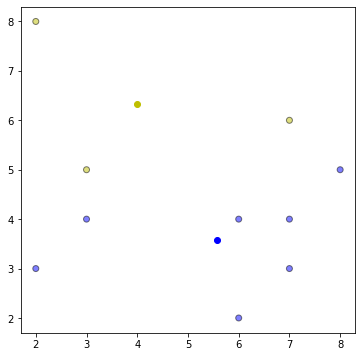

In [8]:
import copy

oc = copy.deepcopy(c)

def update(k):
    for i in c.keys():
        c[i][0] = np.mean(data[data['closest'] == i]['x'])
        c[i][1] = np.mean(data[data['closest'] == i]['y'])
    return k

c = update(c)
print(c)
fig = plt.figure(figsize=(6,6))
mp = plt.axes()
plt.scatter(data['x'], data['y'], color=data['color'], alpha=0.5, edgecolor='k')
for i in c.keys():
    plt.scatter(*c[i], color=colmap[i])
plt.show()

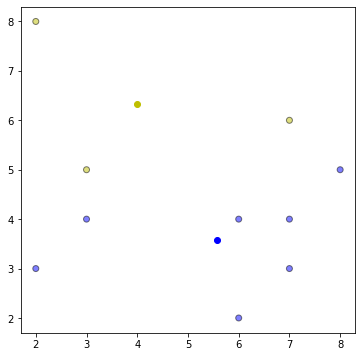

In [9]:
data = assignment(data, c)

## Plot results
fig = plt.figure(figsize=(6,6))
plt.scatter(data['x'], data['y'], color=data['color'], alpha=0.5, edgecolor='k')
for i in c.keys():
    plt.scatter(*c[i], color=colmap[i])
plt.show()

In [10]:
while True:
    cc = data['closest'].copy(deep=True)
    c = update(c)
    df = assignment(data, c)
    if cc.equals(data['closest']):
        break

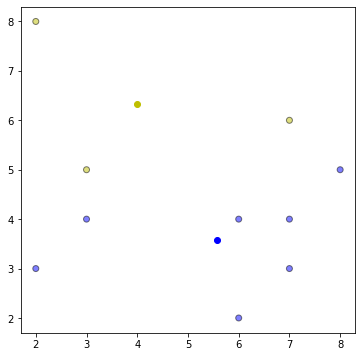

In [11]:
img = plt.figure(figsize=(6,6))
plt.scatter(data['x'], data['y'], color=data['color'], alpha=0.5, edgecolor='k')
for i in c.keys():
    plt.scatter(*c[i], color=colmap[i])
plt.show()

In [12]:
print(c)

{1: [4.0, 6.333333333333333], 2: [5.571428571428571, 3.5714285714285716]}


In [13]:
from sklearn.cluster import KMeans
data = pd.DataFrame({
    'x': [3, 3, 2, 2, 6, 6, 7, 7, 8, 7],
    'y': [5, 4, 8, 3, 2, 4, 3, 4, 5, 6]
})
kmeans = KMeans(n_clusters=2)
kmeans.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [14]:
labels = kmeans.predict(data)
centroids = kmeans.cluster_centers_

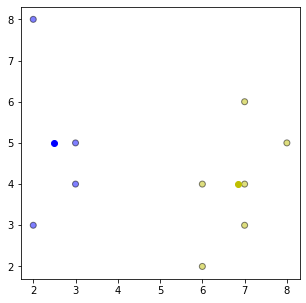

In [15]:
img = plt.figure(figsize=(5,5))

colors = map(lambda x: colmap[x+1], labels)
colors1 = list(colors)
plt.scatter(df['x'], df['y'], color=colors1, alpha=0.5, edgecolor='k')
for idx, centroid in enumerate(centroids):
    plt.scatter(*centroid, color=colmap[idx+1])
plt.show()

In [16]:
print(centroids)

[[6.83333333 4.        ]
 [2.5        5.        ]]


**Task-2 Question -2**

**Using Euclidean distance**

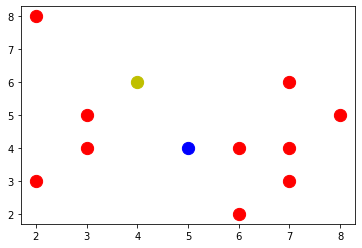

In [17]:
plt.scatter(df['x'], df['y'], s=150, color = 'r')

#Initialize with two centroids
centroids = {1: [4, 6], 2: [5, 4]}

colmap = {1:'y', 2:'b'}

for i in centroids.keys():
    plt.scatter(*centroids[i], s=150, color=colmap[i])

plt.show()

In [18]:
def assignment(df, centroids):
    for i in centroids.keys():
        #Using Euclidean distance as the distance metric
        df['distance_from_{}'.format(i)] = (
            np.sqrt(
                (df['x'] - centroids[i][0]) ** 2
                    + (df['y'] - centroids[i][1]) ** 2))
    centroid_distance_cols = ['distance_from_{}'.format(i) for i in centroids.keys()]
    df['closest'] = df.loc[:, centroid_distance_cols].idxmin(axis=1)
    df['closest'] = df['closest'].map(lambda x: int(x.lstrip('distance_from_')))
    df['color'] = df['closest'].map(lambda x: colmap[x])
    return df

df = assignment(df, centroids)
df.head()

,x,y,dist_from_1,dist_from_2,closest,color,distance_from_1,distance_from_2
0,3,5,2.333333,4.000000,1,y,1.414214,2.236068
1,3,4,3.333333,3.000000,2,b,2.236068,2.000000
2,2,8,3.666667,8.000000,1,y,2.828427,5.000000
3,2,3,5.333333,4.142857,2,b,3.605551,3.162278
4,6,2,6.333333,2.000000,2,b,4.472136,2.236068


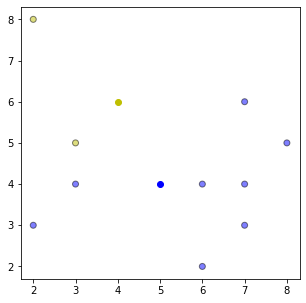

In [19]:
fig = plt.figure(figsize=(5,5))
plt.scatter(df['x'], df['y'], color = df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])

plt.show()

{1: [2.5, 6.5], 2: [5.75, 3.875]}


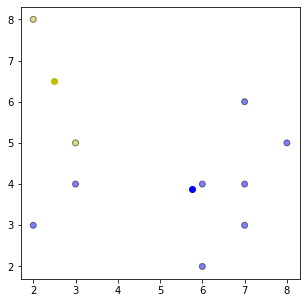

In [20]:
import copy

old_centroids = copy.deepcopy(centroids)

def update(k):
    for i in centroids.keys():
        centroids[i][0] = np.mean(df[df['closest'] == i]['x'])
        centroids[i][1] = np.mean(df[df['closest'] == i]['y'])
    return k

centroids = update(centroids)
print(centroids)
fig = plt.figure(figsize=(5,5))
ax = plt.axes()
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.show()

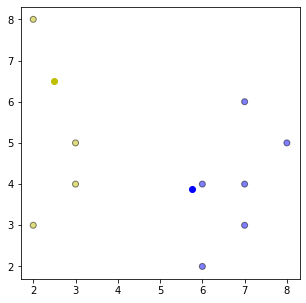

In [21]:
df = assignment(df, centroids)

## Plot results
fig = plt.figure(figsize=(5,5))
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.show()

In [22]:
while True:
    closest_centroids = df['closest'].copy(deep=True)
    centroids = update(centroids)
    df = assignment(df, centroids)
    if closest_centroids.equals(df['closest']):
        break

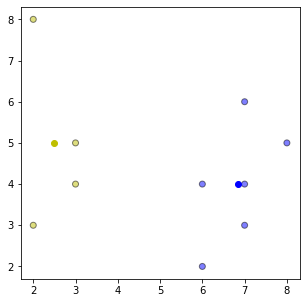

In [23]:
fig = plt.figure(figsize=(5,5))
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.show()

In [24]:
print(centroids)

{1: [2.5, 5.0], 2: [6.833333333333333, 4.0]}


In [25]:
from sklearn.cluster import KMeans
df = pd.DataFrame({
    'x': [3, 3, 2, 2, 6, 6, 7, 7, 8, 7],
    'y': [5, 4, 8, 3, 2, 4, 3, 4, 5, 6]
})
kmeans = KMeans(n_clusters=2)
kmeans.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [26]:
labels = kmeans.predict(df)
centroids = kmeans.cluster_centers_

In [27]:
labels = kmeans.predict(df)
centroids = kmeans.cluster_centers_

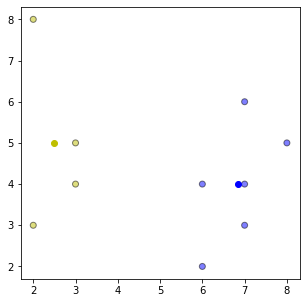

In [28]:
fig = plt.figure(figsize=(5,5))

colors = map(lambda x: colmap[x+1], labels)
colors1 = list(colors)
plt.scatter(df['x'], df['y'], color=colors1, alpha=0.5, edgecolor='k')
for idx, centroid in enumerate(centroids):
    plt.scatter(*centroid, color=colmap[idx+1])
plt.show()

In [29]:
print(centroids)

[[2.5        5.        ]
 [6.83333333 4.        ]]


**Task -1 Question -3**

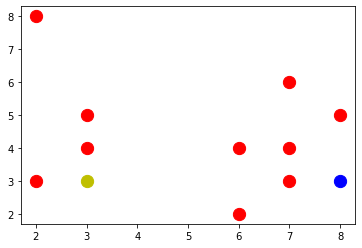

In [30]:
plt.scatter(df['x'], df['y'], s=150, color = 'r')

#Initialize with two centroids
centroids = {1: [3, 3], 2: [8, 3]}

colmap = {1:'y', 2:'b'}

for i in centroids.keys():
    plt.scatter(*centroids[i], s=150, color=colmap[i])

plt.show()

In [31]:
def assignment(df, centroids):
    for i in centroids.keys():
        #Using Manhattan distance as the distance metric
        df['distance_from_{}'.format(i)] = (     
                abs(df['x'] - centroids[i][0]) 
                    + abs(df['y'] - centroids[i][1]))
    centroid_distance_cols = ['distance_from_{}'.format(i) for i in centroids.keys()]
    df['closest'] = df.loc[:, centroid_distance_cols].idxmin(axis=1)
    df['closest'] = df['closest'].map(lambda x: int(x.lstrip('distance_from_')))
    df['color'] = df['closest'].map(lambda x: colmap[x])
    return df

df = assignment(df, centroids)
df.head()

,x,y,distance_from_1,distance_from_2,closest,color
0,3,5,2,7,1,y
1,3,4,1,6,1,y
2,2,8,6,11,1,y
3,2,3,1,6,1,y
4,6,2,4,3,2,b


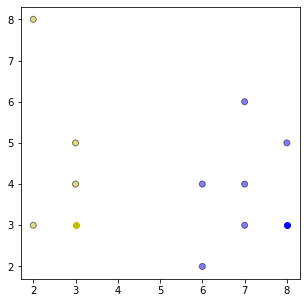

In [32]:
fig = plt.figure(figsize=(5,5))
plt.scatter(df['x'], df['y'], color = df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])

plt.show()

{1: [2.5, 5.0], 2: [6.833333333333333, 4.0]}


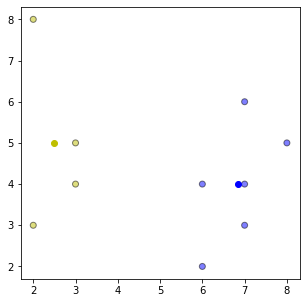

In [33]:
import copy

old_centroids = copy.deepcopy(centroids)

def update(k):
    for i in centroids.keys():
        centroids[i][0] = np.mean(df[df['closest'] == i]['x'])
        centroids[i][1] = np.mean(df[df['closest'] == i]['y'])
    return k

centroids = update(centroids)
print(centroids)
fig = plt.figure(figsize=(5,5))
ax = plt.axes()
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.show()

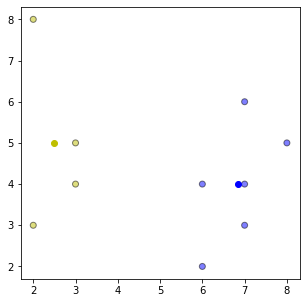

In [34]:
df = assignment(df, centroids)

## Plot results
fig = plt.figure(figsize=(5,5))
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.show()

In [35]:
while True:
    closest_centroids = df['closest'].copy(deep=True)
    centroids = update(centroids)
    df = assignment(df, centroids)
    if closest_centroids.equals(df['closest']):
        break

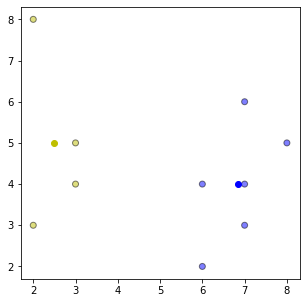

In [36]:
fig = plt.figure(figsize=(5,5))
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.show()

In [37]:
print(centroids)

{1: [2.5, 5.0], 2: [6.833333333333333, 4.0]}


In [38]:
from sklearn.cluster import KMeans
df = pd.DataFrame({
    'x': [3, 3, 2, 2, 6, 6, 7, 7, 8, 7],
    'y': [5, 4, 8, 3, 2, 4, 3, 4, 5, 6]
})
kmeans = KMeans(n_clusters=2)
kmeans.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [39]:
labels = kmeans.predict(df)
centroids = kmeans.cluster_centers_

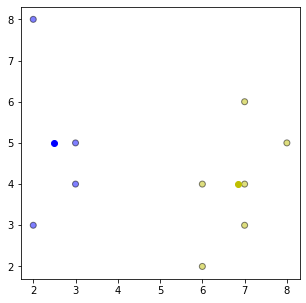

In [40]:
img = plt.figure(figsize=(5,5))

colors = map(lambda x: colmap[x+1], labels)
colors1 = list(colors)
plt.scatter(df['x'], df['y'], color=colors1, alpha=0.5, edgecolor='k')
for idx, centroid in enumerate(centroids):
    plt.scatter(*centroid, color=colmap[idx+1])
plt.show()

In [41]:
print(centroids)

[[6.83333333 4.        ]
 [2.5        5.        ]]


**Task-1 Question-4**

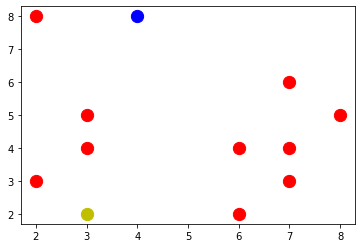

In [42]:
plt.scatter(df['x'], df['y'], s=150, color = 'r')

#Initialize with two centroids
centroids = {1: [3, 2], 2: [4, 8]}

colmap = {1:'y', 2:'b'}

for i in centroids.keys():
    plt.scatter(*centroids[i], s=150, color=colmap[i])

plt.show()

In [43]:
def assignment(df, centroids):
    for i in centroids.keys():
        #Using Manhattan distance as the distance metric
        df['distance_from_{}'.format(i)] = (     
                abs(df['x'] - centroids[i][0]) 
                    + abs(df['y'] - centroids[i][1]))
    centroid_distance_cols = ['distance_from_{}'.format(i) for i in centroids.keys()]
    df['closest'] = df.loc[:, centroid_distance_cols].idxmin(axis=1)
    df['closest'] = df['closest'].map(lambda x: int(x.lstrip('distance_from_')))
    df['color'] = df['closest'].map(lambda x: colmap[x])
    return df

df = assignment(df, centroids)
df.head()

,x,y,distance_from_1,distance_from_2,closest,color
0,3,5,3,4,1,y
1,3,4,2,5,1,y
2,2,8,7,2,2,b
3,2,3,2,7,1,y
4,6,2,3,8,1,y


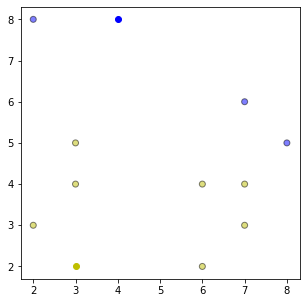

In [44]:
fig = plt.figure(figsize=(5,5))
plt.scatter(df['x'], df['y'], color = df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])

plt.show()

{1: [4.857142857142857, 3.5714285714285716], 2: [5.666666666666667, 6.333333333333333]}


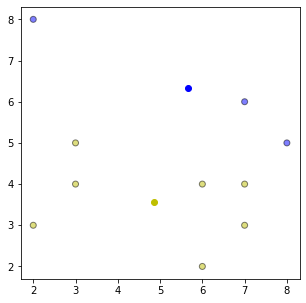

In [45]:
import copy

old_centroids = copy.deepcopy(centroids)

def update(k):
    for i in centroids.keys():
        centroids[i][0] = np.mean(df[df['closest'] == i]['x'])
        centroids[i][1] = np.mean(df[df['closest'] == i]['y'])
    return k

centroids = update(centroids)
print(centroids)
fig = plt.figure(figsize=(5,5))
ax = plt.axes()
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.show()

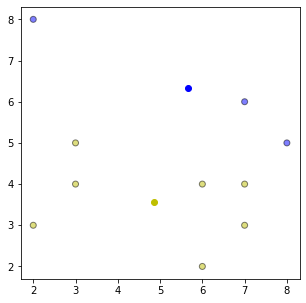

In [46]:
df = assignment(df, centroids)

## Plot results
fig = plt.figure(figsize=(5,5))
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.show()

In [47]:
while True:
    closest_centroids = df['closest'].copy(deep=True)
    centroids = update(centroids)
    df = assignment(df, centroids)
    if closest_centroids.equals(df['closest']):
        break

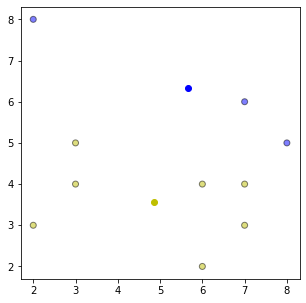

In [48]:
fig = plt.figure(figsize=(5,5))
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.show()

In [49]:
print(centroids)

{1: [4.857142857142857, 3.5714285714285716], 2: [5.666666666666667, 6.333333333333333]}


In [50]:
from sklearn.cluster import KMeans
df = pd.DataFrame({
    'x': [3, 3, 2, 2, 6, 6, 7, 7, 8, 7],
    'y': [5, 4, 8, 3, 2, 4, 3, 4, 5, 6]
})
kmeans = KMeans(n_clusters=2)
kmeans.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [51]:
labels = kmeans.predict(df)
centroids = kmeans.cluster_centers_

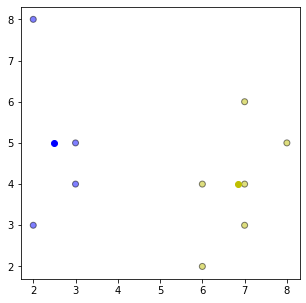

In [52]:
img = plt.figure(figsize=(5,5))

colors = map(lambda x: colmap[x+1], labels)
colors1 = list(colors)
plt.scatter(df['x'], df['y'], color=colors1, alpha=0.5, edgecolor='k')
for idx, centroid in enumerate(centroids):
    plt.scatter(*centroid, color=colmap[idx+1])
plt.show()

In [53]:
print(centroids)

[[6.83333333 4.        ]
 [2.5        5.        ]]
